In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


# Reading the Etymology Dataset from CSV
etymology = pd.read_csv('/kaggle/input/dataset/etymology.csv')
display(etymology)

,term_id,lang,term,reltype,related_term_id,related_lang,related_term,position,group_tag,parent_tag,parent_position
0,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,group_derived_root,NaN,NaN,NaN,0,0IIU6TlkSA2D7dg1PfxGOw,NaN,NaN
1,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,borrowed_from,fhl-sdgwXaWvYD8CgaKXpQ,Latin,thēsaurus,0,NaN,0IIU6TlkSA2D7dg1PfxGOw,0.0
2,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,derived_from,7Rf1835bWYmlH9VnyYVbpg,Ancient Greek,θησαυρός,0,NaN,0IIU6TlkSA2D7dg1PfxGOw,1.0
3,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,doublet_with,sqiifJX3XIOQ0vZ0trzRaA,English,treasure,0,NaN,NaN,NaN
4,iwDzanYmWxaUKbOlUy2yyQ,Latin,thesaurus,derived_from,7Rf1835bWYmlH9VnyYVbpg,Ancient Greek,θησαυρός,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3884332,ttDtihHdV4aL8aDWZpIgnQ,English,Boell,borrowed_from,AUIYyyL0V_2rTzbDwWeVig,Danish,Bøll,0,NaN,VfBh8FOWR_muVFpFl7EOvw,0.0
3884333,ttDtihHdV4aL8aDWZpIgnQ,English,Boell,borrowed_from,_zZUp3xTUyyi8TrPVMfOUw,German,Böll,0,NaN,VfBh8FOWR_muVFpFl7EOvw,1.0
3884334,s0ANGE2hXn6nen8AFLynOg,South Levantine Arabic,بالمية,has_affix,QLqQUWCoUu6hQGr40QVQyw,South Levantine Arabic,بـ,0,NaN,NaN,NaN
3884335,s0ANGE2hXn6nen8AFLynOg,South Levantine Arabic,بالمية,has_affix,sVDOI8DxUwq2DD03Y3HGdw,South Levantine Arabic,الميّة,1,NaN,NaN,NaN


In [2]:
# Different columns of the Etymology Dataset
etymology.columns

Index(['term_id', 'lang', 'term', 'reltype', 'related_term_id', 'related_lang',
       'related_term', 'position', 'group_tag', 'parent_tag',
       'parent_position'],
      dtype='object')

In [3]:
# Creating a new DataFrame with fewer columns and just English words
df = etymology[etymology['lang'] == 'English']
engl = df.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)
display(engl)

,term,reltype,related_lang,related_term
0,thesaurus,group_derived_root,NaN,NaN
1,thesaurus,borrowed_from,Latin,thēsaurus
2,thesaurus,derived_from,Ancient Greek,θησαυρός
3,thesaurus,doublet_with,English,treasure
5,portmanteau,has_root,Proto-Indo-European,*per- (fare)
...,...,...,...,...
3884219,Halloweek,blend_of,English,week
3884331,Boell,group_related_root,NaN,NaN
3884332,Boell,borrowed_from,Danish,Bøll
3884333,Boell,borrowed_from,German,Böll


In [4]:
# Checking the relation types a term can have
engl['reltype'].unique()

array(['group_derived_root', 'borrowed_from', 'derived_from',
       'doublet_with', 'has_root', 'group_affix_root',
       'etymologically_related_to', 'group_related_root',
       'inherited_from', 'cognate_of', 'abbreviation_of', 'clipping_of',
       'has_affix', 'is_onomatopoeic', 'compound_of',
       'has_prefix_with_root', 'has_suffix', 'has_confix', 'calque_of',
       'blend_of', 'has_prefix', 'back-formation_from',
       'learned_borrowing_from', 'unadapted_borrowing_from',
       'named_after', 'orthographic_borrowing_from', 'semantic_loan_of',
       'initialism_of', 'phono-semantic_matching_of',
       'semi_learned_borrowing_from'], dtype=object)

In [5]:
# Preparing Series to make a piechart of English loanwords
related_counts = engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()
piechart_lst = related_counts[related_counts >= 150]
other = pd.Series({'Other': engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()[engl['related_lang'].value_counts() < 150].sum()})
piechart_series = pd.concat([piechart_lst, other])
piechart_series

French            4499
Latin             3504
Italian           2236
Spanish           2094
German            2056
Japanese          1840
Ancient Greek     1025
Arabic             758
Middle French      673
Russian            634
Polish             537
Hindi              508
Dutch              429
Sanskrit           417
Portuguese         317
Hebrew             309
New Latin          265
Late Latin         248
Swedish            220
Irish              209
Persian            196
Afrikaans          191
Yiddish            186
Medieval Latin     182
Korean             181
Greek              170
Armenian           158
Malay              155
Vietnamese         152
Other             2616
dtype: int64

<Axes: title={'center': 'Number of English Words Borrowed from Each Language'}>

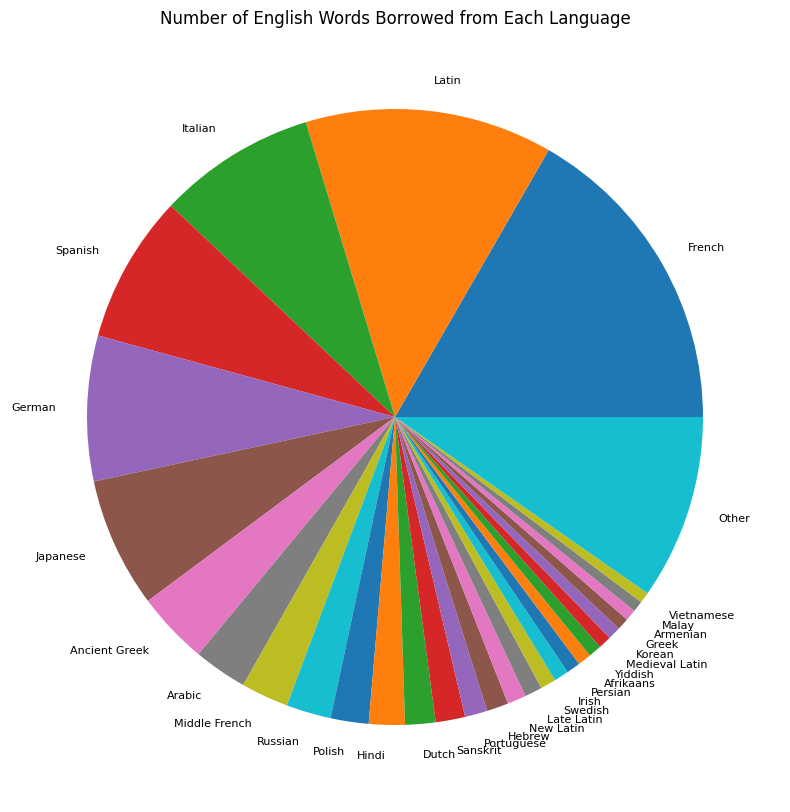

In [6]:
# Plotting piechart
piechart_series.plot.pie(figsize = (10, 10), title = 'Number of English Words Borrowed from Each Language', fontsize = 8)

In [7]:
# Reading the English Word Frequency Dataset from CSV
freqs = pd.read_csv('/kaggle/input/english-word-frequency/unigram_freq.csv')
freqs.set_index('word', inplace = True)
freqs

,count
word,
the,23135851162
of,13151942776
and,12997637966
to,12136980858
a,9081174698
...,...
gooek,12711
gooddg,12711
gooblle,12711


In [8]:
# Joining DataFrames into a new DataFrame df
df = engl.set_index('term').join(freqs).sort_values('count', ascending = False).dropna(subset = ['count'])
df['freq'] = df['count'] / freqs['count'].sum()
df

,reltype,related_lang,related_term,count,freq
term,,,,,
the,cognate_of,Tocharian B,se,2.313585e+10,3.933838e-02
the,cognate_of,Swedish,ty,2.313585e+10,3.933838e-02
the,cognate_of,Icelandic,sá,2.313585e+10,3.933838e-02
the,group_related_root,NaN,NaN,2.313585e+10,3.933838e-02
the,cognate_of,Sanskrit,sá,2.313585e+10,3.933838e-02
...,...,...,...,...,...
polymethylmethacrylate,compound_of,English,polymethyl,1.271400e+04,2.161788e-08
unswitched,has_prefix_with_root,English,switched,1.271200e+04,2.161448e-08
unswitched,has_prefix,English,un,1.271200e+04,2.161448e-08


In [9]:
# Creating a DataFrame of only loanwords
borrowed_df = df[df['reltype'] == 'borrowed_from']
borrowed_df

,reltype,related_lang,related_term,count,freq
term,,,,,
or,borrowed_from,Middle French,or,2.590740e+09,4.405090e-03
as,borrowed_from,Latin,as,2.247432e+09,3.821356e-03
an,borrowed_from,Georgian,ან,1.518267e+09,2.581541e-03
no,borrowed_from,Latin,numero,9.371123e+08,1.593392e-03
so,borrowed_from,Japanese,蘇,6.618096e+08,1.125289e-03
...,...,...,...,...,...
triolet,borrowed_from,French,triolet,1.280000e+04,2.176411e-08
rempli,borrowed_from,French,rempli,1.278400e+04,2.173690e-08
cachepot,borrowed_from,French,cache-pot,1.276200e+04,2.169950e-08


In [10]:
# Preparing Series for piecharts for Hypothesis 1
top_2000_df = borrowed_df.iloc[:2000]
top_4000_df = borrowed_df.iloc[2000:4000]
other_df = borrowed_df.iloc[4000:]

top_2000_counts = top_2000_df['related_lang'].value_counts()
top_2000_lst = top_2000_counts[top_2000_counts >= 15]
top_2000_other = pd.Series({'Other': top_2000_counts[top_2000_counts < 15].sum()})
top_2000_series = pd.concat([top_2000_lst, top_2000_other])

top_4000_counts = top_4000_df['related_lang'].value_counts()
top_4000_lst = top_4000_counts[top_4000_counts >= 15]
top_4000_other = pd.Series({'Other': top_4000_counts[top_4000_counts < 15].sum()})
top_4000_series = pd.concat([top_4000_lst, top_4000_other])

other_counts = other_df['related_lang'].value_counts()
other_lst = other_counts[other_counts >= 20]
other_other = pd.Series({'Other': other_counts[other_counts < 20].sum()})
other_series = pd.concat([other_lst, other_other])

<Axes: title={'center': 'Number of The Top 2000 English Loanwords Borrowed from Each Language'}>

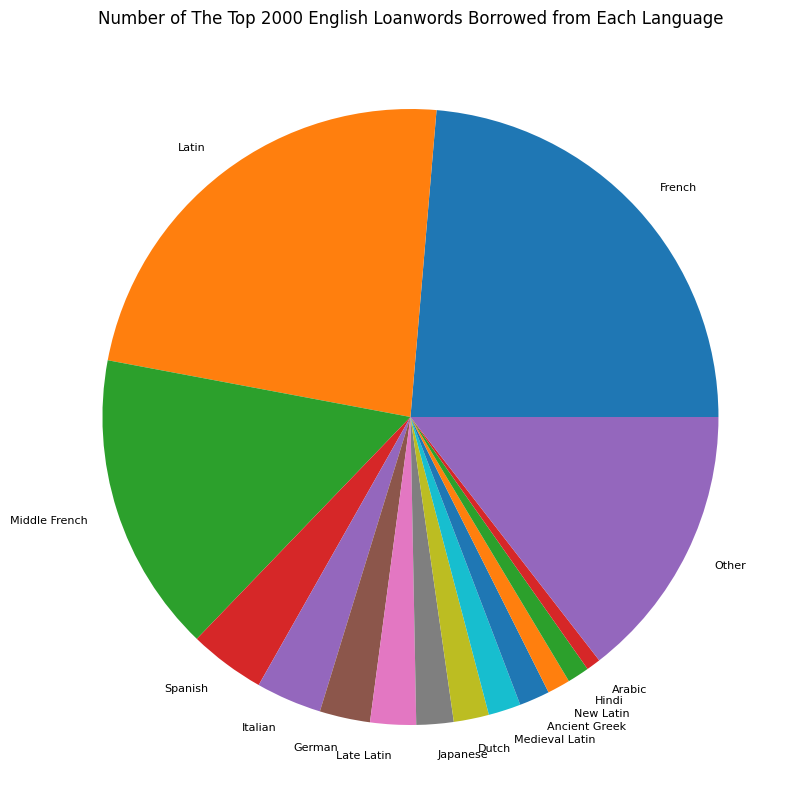

In [11]:
top_2000_series.plot.pie(figsize = (10, 10), title = 'Number of The Top 2000 English Loanwords Borrowed from Each Language', fontsize = 8)

<Axes: title={'center': 'Number of The Top 2000-4000 English Loanwords Borrowed from Each Language'}>

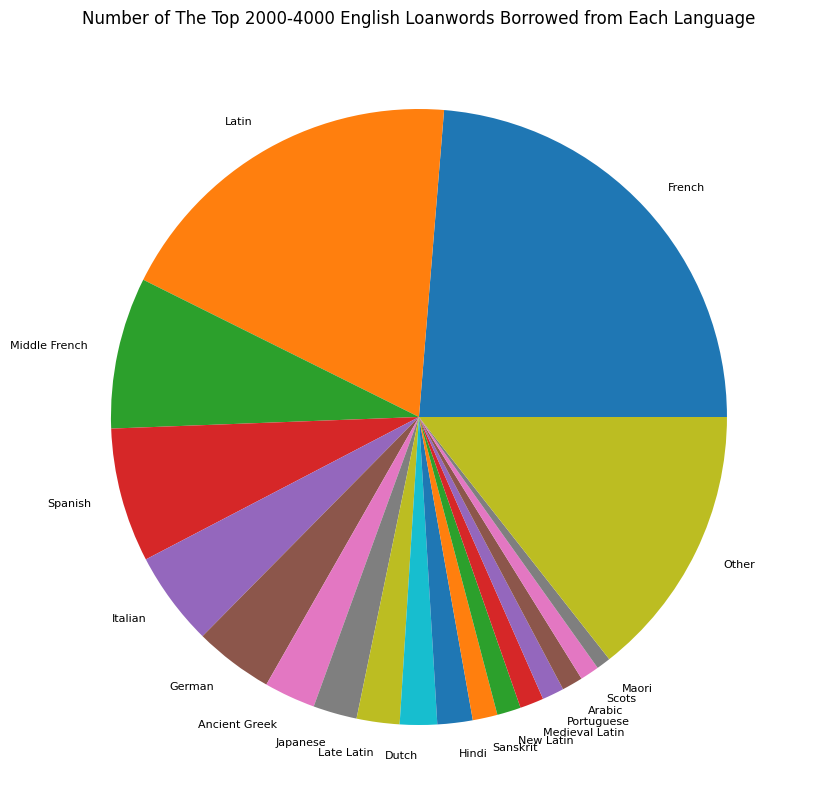

In [12]:
top_4000_series.plot.pie(figsize = (10, 10), title = 'Number of The Top 2000-4000 English Loanwords Borrowed from Each Language', fontsize = 8)

<Axes: title={'center': 'Number of English Loanwords Other Than The Top 4000 Borrowed from Each Language'}>

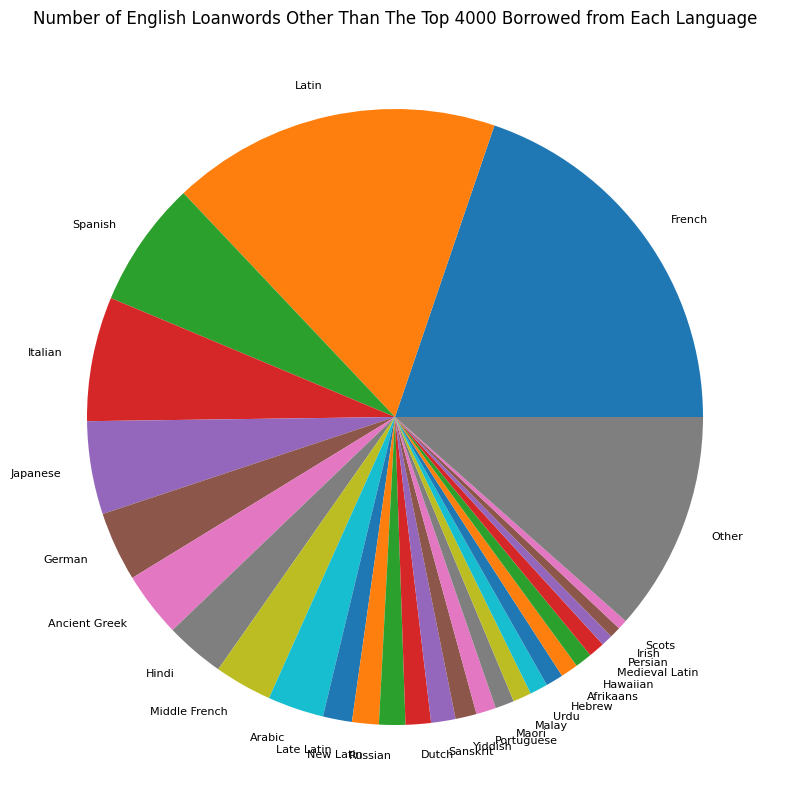

In [13]:
other_series.plot.pie(figsize = (10, 10), title = 'Number of English Loanwords Other Than The Top 4000 Borrowed from Each Language', fontsize = 8)

# Machine Learning Analysis

**Problem**: Create a model that can predict which language an English loanword was borrowed from.

**Analysis Steps**:
1. Encode the terms (features) and languages (targets)
2. Perform K-Fold Cross Validation with K-Nearest Neighbors, Decision Tree, and Random Forest models
3. Train a Feed-Forward Neural Network model
4. Train a Recurrent Neural Network model
5. Visualization

**Notes for Different Steps**:

Encoding:
* Standard word embedding library models (e.g. Word2Vec, BERT) don't work for us because they encode the semantic meanings of words but we want models to use individual letters as features, so transfer learning doesn't help us here
* Direct one-hot encoding only works for languages, not terms
* I tried using CountVectorizer for the terms, which counts the frequency of substrings of particular sizes in each word, but the number of dimensions of the input grew to be in the thousands and dimensionality reduction didn't help
* Instead, for cross validation and the FNN model I converted each word to a list of ASCII values, applied min-max scaling, and padded each list so that they were all the same length (after which I used principal components analysis for dimensionality reduction for good measure, although that could be redundant)
* For the RNN model, I used the approach they used in the tutorial where they converted each word to a tensor with one-hot encodings of each letter

K-Fold Cross Validation:
* Not much to say other than the accuracies are pretty bad

FNN Model:
* This model is the same as the MLPClassifier in HW5 but modified for our problem
* Again, this model isn't good at all
* I've tried to improve it by making it more complex but it just ends up (poorly) overfitting

RNN Model:
* Created following this [PyTorch tutorial](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial) (make sure to cite in final document!)
* This model's accuracy isn't that great either

Visualization:
* FNN and RNN loss graphs and a confusion matrix for the RNN have been made so far


**Ideas for Improvement**:
* Group together similar languages (e.g. Latin, New Latin, Late Latin -> Latin) in targets to make it easier for models to distinguish features of different categories
* Making the number of languages to guess from fewer (I did this below by only including words borrowed from languages that have more than a certain number of entries in the dataset, maybe this number should be higher)
* Experiment with different encodings (like using the word encoding technique for the RNN for the FNN as well)
* Play around with hyperparameters such as learning rate, batch size, number of epochs, different optimizers, number of neurons in the hidden layers, etc.

Ultimately, we don't know how feasible this task is. It could be the case that these words aren't very separable into their respective original languages, in which case high accuracy isn't to be expected. I'm confident we can do better than what I did though. Let me (Aybars) know if my code is particularly bad in some places and I'll do my best to explain it.

In [14]:
# Preparing ml_df DataFrame for Machine Learning Analysis
ml_df = borrowed_df.drop(['reltype', 'related_term', 'count', 'freq'], axis = 1)
langs = ml_df.value_counts()[ml_df.value_counts() >= 100].index.get_level_values(0)
ml_df = ml_df[ml_df['related_lang'].isin(langs)].reset_index().drop_duplicates().dropna()
#ml_df2 = ml_df.copy()
language_to_family = {
    "Middle French": "Latin",
    "New Latin": "Latin",
    "Late Latin": "Latin",
    "French": "Latin",
    "Spanish": "Latin",
    "Italian": "Latin",
    "German": "Germanic",
    "Hindi": "Sanskrit",
    "Ancient Greek": "Hellenic",
    "Dutch": "Germanic",
    "Arabic": "Semitic",
    "Japanese": "Japonic",
    "Latin": "Latin",
    
}
    
    

# Update the 'Language' column with the corresponding language family
ml_df['related_lang'] = ml_df['related_lang'].map(language_to_family)

ml_df

,term,related_lang
0,or,Latin
1,as,Latin
2,no,Latin
3,so,Japonic
4,back,Latin
...,...,...
6398,triolet,Latin
6399,rempli,Latin
6400,cachepot,Latin
6401,blessure,Latin


In [15]:
# Finding the maximum word length in ml_df
max_word_length = max([len(str(word)) for word in ml_df['term'].values])
max_word_length

18

In [16]:
# Preparing the array of features X
X = [([(ord(c) - 97) / 26 for c in list(word)] + ([-1] * (max_word_length - len(word)))) for word in [str(word) for word in ml_df['term'].values]]
X[0]

[0.5384615384615384,
 0.6538461538461539,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [17]:
# Preparing the array of targets y
y = [str(lang) for lang in ml_df['related_lang'].values]
y[0]

'Latin'

In [18]:
# Importing the necessary modules for encoding the features and targets
from sklearn.preprocessing import OneHotEncoder
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Test dataset is 20% of the data
seed = 42
test_size = 0.2

# Experiments with CountVectorizer to encode X
# vectorizer = CountVectorizer(analyzer = 'char', ngram_range = (3, 5))
# X = vectorizer.fit_transform([str(word) for word in ml_df.index.values]).toarray()
# vectorizer.get_feature_names_out()

In [19]:
# Dimensionality reduction of X using PCA
pca = PCA(n_components = 12)
X_pca = pca.fit_transform(X)
X_pca

array([[-1.62315221,  0.98673352, -0.77925854, ..., -0.17699336,
         0.61193934,  0.00789381],
       [-1.61196386,  0.98342806, -0.77002492, ..., -0.09707927,
         0.81978118,  0.00502686],
       [-1.62388795,  0.98415434, -0.77746888, ..., -0.13486967,
         0.69875512,  0.01102588],
       ...,
       [ 0.96706431, -0.56757192, -0.82926439, ..., -0.10366399,
         0.62386879,  0.05713942],
       [ 0.92803864, -1.01502757, -0.25364389, ..., -0.11248589,
         0.30755099,  0.01764142],
       [ 1.65599116,  0.70233064, -0.06117998, ..., -0.37162951,
         0.36183277,  0.24566881]])

In [20]:
# How well the dimensionality reduction explains variance in the data
sum(pca.explained_variance_ratio_)

0.9908155936134219

In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = test_size, random_state = seed)

In [22]:
# K-Fold Cross Validation
models = {
            'KNN' : KNeighborsClassifier(),
            'Decision Tree' : DecisionTreeClassifier(),
            'Random Forest' : RandomForestClassifier(),
         }

k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)

np.random.seed(seed)

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv = skf)
    print(model_name + ':\n' + '\tMean: ' + str(scores.mean()) + '\n\tStandard Deviation: ' + str(scores.std()))

KNN:
	Mean: 0.7747406297664119
	Standard Deviation: 0.0038076452318340777
Decision Tree:
	Mean: 0.671254809962914
	Standard Deviation: 0.006620973048833363
Random Forest:
	Mean: 0.7889030187598232
	Standard Deviation: 0.0057627372819359125


In [23]:
# One-Hot Encoding y for MLP Classification
enc = OneHotEncoder()
y = enc.fit_transform(np.reshape([str(lang) for lang in ml_df['related_lang'].values], (-1, 1))).toarray()
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = test_size, random_state = seed)

In [24]:
# Importing ML modules
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Preparing datasets for MLP Classification
train_data = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
test_data = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))

train_loader = DataLoader(train_data, batch_size = 5122, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 1281)

batch_size = train_loader.batch_size
num_train_data = len(train_loader.dataset)
num_test_data = len(test_loader.dataset)
feat_dim = len(next(iter(train_loader))[0][0])
out_dim = len(next(iter(train_loader))[1][0])

In [25]:
# Setup for FNN model
# Note: softmax is not used for last layer because we are using Cross Entropy Loss

class MLPModel(nn.Module):
    def __init__(self, feat_dim, out_dim):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(feat_dim, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, out_dim)
        self.double()

    def forward(self, x):
        x1 = F.relu(self.fc1(x))
        x2 = F.relu(self.fc2(x1))
        x3 = F.relu(self.fc3(x2))
        return self.fc4(x3)

# Instantiating the model
model = MLPModel(feat_dim, out_dim)

In [26]:
# Using Cross Entropy Loss with Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
# optimizer = torch.optim.SGD(model.parameters(), lr=3e-3, momentum=0.9)

# Training
epochs = 1000
print_every = 50
losses = []
for epoch in range(1, epochs + 1):
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        preds = model(data)
        loss = criterion(preds, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    if (epoch % print_every == 0):
        print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')

print('Finished Training')

Epoch 50/1000, Loss: 0.7589741482504668
Epoch 100/1000, Loss: 0.7410319188295469
Epoch 150/1000, Loss: 0.72158223378215
Epoch 200/1000, Loss: 0.7060418670640737
Epoch 250/1000, Loss: 0.6813799161208577
Epoch 300/1000, Loss: 0.6570901167320806
Epoch 350/1000, Loss: 0.6353815211901278
Epoch 400/1000, Loss: 0.620592074007102
Epoch 450/1000, Loss: 0.6059890156305182
Epoch 500/1000, Loss: 0.5975639869724152
Epoch 550/1000, Loss: 0.5780427043599807
Epoch 600/1000, Loss: 0.5668173404797434
Epoch 650/1000, Loss: 0.560328087118418
Epoch 700/1000, Loss: 0.5656287569240225
Epoch 750/1000, Loss: 0.5417641235080846
Epoch 800/1000, Loss: 0.5272664994029032
Epoch 850/1000, Loss: 0.5193815688880229
Epoch 900/1000, Loss: 0.5214982741561087
Epoch 950/1000, Loss: 0.5028491974934809
Epoch 1000/1000, Loss: 0.49464219110504287
Finished Training


Train Loss: 0.494872431391333
Test Loss: 1.25661980140083


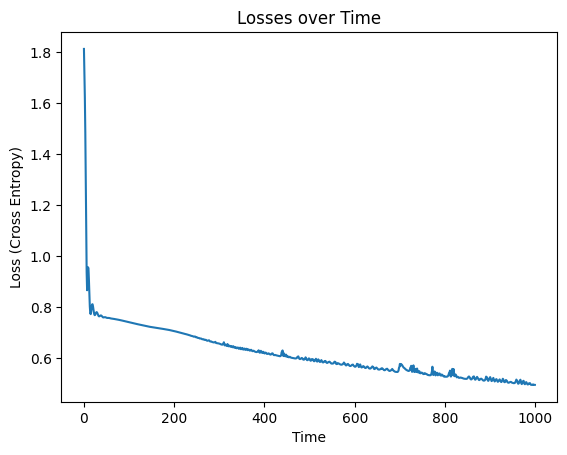

In [27]:
# Plotting loss function for each iteration of training
test_loss = 0.0
for batch_idx, (data, targets) in enumerate(test_loader):
    loss = criterion(model(data), targets)
    test_loss += loss.item()
test_loss = test_loss / len(test_loader)

train_loss = 0.0
for batch_idx, (data, targets) in enumerate(train_loader):
    loss = criterion(model(data), targets)
    train_loss += loss.item()
train_loss = train_loss / len(train_loader)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

plt.plot(losses)
plt.title("Losses over Time")
plt.xlabel("Time")
plt.ylabel("Loss (Cross Entropy)")
plt.show()

In [28]:
# Encoding words to tensors for RNN classification
import string

def word_to_tensor(word):
    try:
        tensor = torch.zeros(len(word), 1, 26)
        for li, letter in enumerate(word):
            tensor[li][0][string.ascii_lowercase.find(letter)] = 1
        return tensor
    except:
        print(word)

# Example encoding
word_to_tensor('ab')

tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [29]:
# Setup for RNN classification
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    # initHidden
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

# Instantiating the RNN model
all_langs = ml_df['related_lang'].unique()
n_letters = 26
n_langs = len(all_langs)
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_langs)

In [30]:
# Example RNN output for input 'word'
input = word_to_tensor('word')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-1.8515, -1.7936, -1.8324, -1.8613, -1.7390, -1.6850]],
       grad_fn=<LogSoftmaxBackward0>)


In [31]:
# Converting output into a language classification
def lang_from_output(output):
    top_n, top_i = output.topk(1)
    lang_i = top_i[0].item()
    return all_langs[lang_i], lang_i

# Classification of above example
lang_from_output(output)

('Sanskrit', 5)

In [32]:
# Generating random pairs of words with the languages they were borrowed from
def random_training_example():
    random_row = ml_df.sample(n = 1)
    word = random_row.iloc[0]['term']
    lang = random_row.iloc[0]['related_lang']
    lang_tensor = torch.tensor([list(all_langs).index(lang)], dtype=torch.long)
    word_tensor = word_to_tensor(word)
    return lang, word, lang_tensor, word_tensor

# Examples of pairs
for i in range(100):
    lang, word, lang_tensor, word_tensor = random_training_example()
    print('language =', lang, '/ word =', word)

language = Latin / word = adnexa
language = Latin / word = junta
language = Latin / word = perineum
language = Latin / word = gavage
language = Latin / word = primo
language = Latin / word = brasserie
language = Latin / word = skeleton
language = Latin / word = integral
language = Latin / word = habanera
language = Latin / word = socialism
language = Latin / word = adduction
language = Sanskrit / word = chur
language = Hellenic / word = scalene
language = Latin / word = breccia
language = Latin / word = bazaar
language = Latin / word = detritus
language = Latin / word = alambre
language = Latin / word = abonnement
language = Latin / word = inventor
language = Japonic / word = ninja
language = Latin / word = salute
language = Latin / word = mistic
language = Hellenic / word = raphe
language = Latin / word = ponce
language = Latin / word = continuum
language = Latin / word = morion
language = Latin / word = isolation
language = Latin / word = mezquita
language = Hellenic / word = dyad
la

In [33]:
# Defining loss function, learning rate, and training function
criterion = nn.NLLLoss()

learning_rate = 0.005

def train(lang_tensor, word_tensor):
    hidden = rnn.init_hidden()

    rnn.zero_grad()

    for i in range(word_tensor.size()[0]):
        output, hidden = rnn(word_tensor[i], hidden)

    loss = criterion(output, lang_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [34]:
import time
import math


# Number of epochs is so high because we're using a batch size of 1
# On average takes about 5 minutes to finish training
n_iters = 100000
print_every = 5000
plot_every = 1000



# Keeping track of losses for plotting
current_loss = 0
all_losses = []

# Keeping track of time elapsed
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

# Training
for iter in range(1, n_iters + 1):
    lang, word, lang_tensor, word_tensor = random_training_example()
    output, loss = train(lang_tensor, word_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess, guess_i = lang_from_output(output)
        correct = '✓' if guess == lang else '✗ (%s)' % lang
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, word, guess, correct))

    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 16s) 0.2465 expose / Latin ✓
10000 10% (0m 32s) 0.0345 complicate / Latin ✓
15000 15% (0m 48s) 0.7163 gena / Latin ✓
20000 20% (1m 4s) 0.0609 rafale / Latin ✓
25000 25% (1m 21s) 0.0486 reparable / Latin ✓
30000 30% (1m 36s) 0.0207 oeuvre / Latin ✓
35000 35% (1m 52s) 2.8627 auslese / Latin ✗ (Germanic)
40000 40% (2m 7s) 0.1071 dauphine / Latin ✓
45000 45% (2m 21s) 0.0215 okonomiyaki / Japonic ✓
50000 50% (2m 37s) 2.9887 kendra / Japonic ✗ (Sanskrit)
55000 55% (2m 53s) 0.0553 defeatist / Latin ✓
60000 60% (3m 9s) 0.8311 higashi / Japonic ✓
65000 65% (3m 24s) 0.0804 dessert / Latin ✓
70000 70% (3m 40s) 0.0952 stole / Latin ✓
75000 75% (3m 55s) 0.0189 portfolio / Latin ✓
80000 80% (4m 10s) 1.2734 panda / Sanskrit ✗ (Latin)
85000 85% (4m 24s) 0.3106 abra / Latin ✓
90000 90% (4m 39s) 0.2308 oxalic / Latin ✓
95000 95% (4m 54s) 0.0337 apostate / Latin ✓
100000 100% (5m 8s) 2.6700 coma / Latin ✗ (Hellenic)


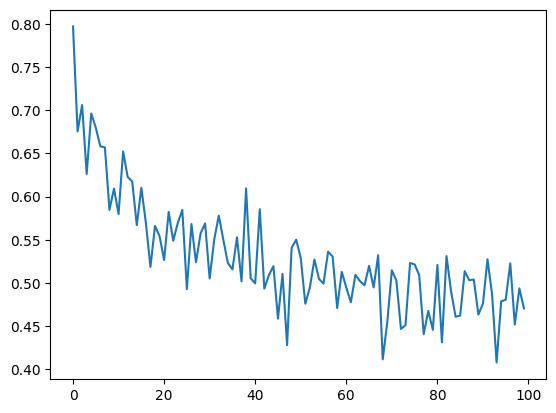

In [35]:
# Plotting loss
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

/tmp/ipykernel_93/41513570.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_langs, rotation=90)
/tmp/ipykernel_93/41513570.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_langs)


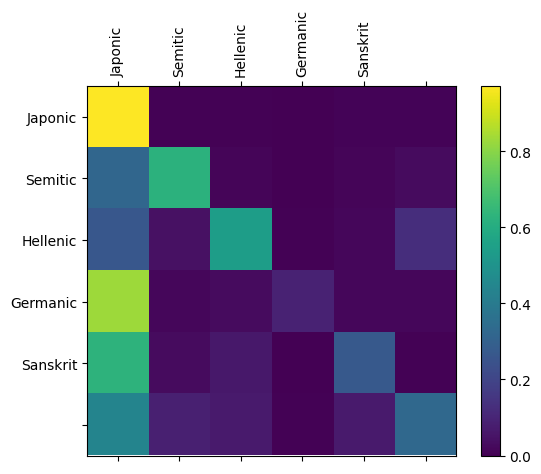

In [36]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_langs, n_langs)
n_confusion = 10000

# Return an output given a word
def evaluate(word_tensor):
    hidden = rnn.init_hidden()

    for i in range(word_tensor.size()[0]):
        output, hidden = rnn(word_tensor[i], hidden)

    return output

# Record which examples are correctly guessed out of many randomly sampled examples
for i in range(n_confusion):
    lang, word, lang_tensor, word_tensor = random_training_example()
    output = evaluate(word_tensor)
    guess, guess_i = lang_from_output(output)
    lang_i = list(all_langs).index(lang)
    confusion[lang_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_langs):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_langs, rotation=90)
ax.set_yticklabels([''] + all_langs)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
# WARNING: CONFUSION MATRIX DOESN'T SHOW ALL LANGUAGES FOR SOME REASON
plt.show()

In [37]:
# Accuracy for RNN
# Hovers around 52%, which isn't terrible
iters = 1000
correct = 0

for _ in range(iters):
    lang, word, lang_tensor, word_tensor = random_training_example()
    output = evaluate(word_tensor)
    pred_lang = lang_from_output(output)[0]
    if (pred_lang == lang):
        correct += 1

print(correct / iters)

0.852
